# Final Project - MTH 281
## Zihao Lin, Yichen Wang, Junjie Wang

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Question 1

### (a)

We have $\frac{\partial u}{\partial t} + U_0 \frac{\partial u}{\partial x} = 0$ and $ U_0 = 0.1$. Given $ U = e ^{i(kx - \omega t)}$, we have  $\frac{1}{U_0 * e ^{-i\omega t}} \frac{d e ^{-i\omega t}}{d t} = - \frac{1}{e ^{-i k t}} \frac{d e ^{-i k t}}{d x} = - \lambda $ 

ODE #1 : $- \frac{1}{e ^{-i k t}} \frac{d e ^{-i k t}}{d x} = - \lambda $ 

ODE #2 : $\frac{1}{U_0 * e ^{-i\omega t}} \frac{d e ^{-i\omega t}}{d t} = - \lambda $ 

By solving both ODEs, We get $\lambda = ik$; $\omega = kU_0$

$u(x;t)= exp[i(kx-k U_o t)] = 1*exp[i(kx-k U_o t)] $ where $w = k U_o$, and constant 1 is the oscillating term while $exp(-ik U_o t) $ is the decaying term 

Function u represents a serier of fourier sum, the only dependent factor k (wavenumber) shows both x and t's wavenumbers are correlated. Then, its temporal behavior becomes predictable. Using the method of characteristic, we obtain solution of u(x,t) = f(x - U0t) with f(x) being the initial condition. Thus the temporal behavior of the function is like the initial condition f(x) is propagating to the right as time progresses. 

After applying the initial condition, we get
$u(x;t)= sin( \frac{4 \pi}{Lx}(x - U_0 t)) + 0.25 sin( \frac{8 \pi}{Lx} (x - U_0 t))$

### (b)

In [276]:
# Final time of the simulation
final_time = 50.

# Number of points in the computational grid
Nx = 128

# CFL factor
CFL = 0.05

# PDE Parameters
U0 = 0.1
Lx = 10.

# dx and dt
delta_x = Lx / Nx
delta_t = CFL * delta_x / U0

print("Delta t = {0:g}, Delta x = {1:g}".format(delta_t, delta_x))

# Create spatial grid
x = np.arange(delta_x / 2. - Lx/2, Lx/2, delta_x)

# Specify the number of time points to store (Nouts)
#  they will be equally spaced throughout the simulation.
Nouts = int(final_time/delta_t)
output_interval = final_time / Nouts
t = np.zeros(Nouts + 1)
t[0] = 0.

# Create an array to store the solution, and write in the initial conditions
solution = np.zeros((Nouts + 1,Nx))
solution[0,:] = np.sin( 4 * np.pi * x / Lx ) + 0.25 * np.sin( 8 * np.pi * x / Lx )

Delta t = 0.0390625, Delta x = 0.078125


We have chosen $Nx=128$, and $\Delta t =CFL \times \Delta x / U_0$. In our case, we pick $\Delta x= 0.078125$, and $CFL=0.05$, thus our $\Delta t$ is 0.0390625. In order to minimize the "Pixelization effect" in the color diagram, we decided to raise Nx from 32 to 128, where 128 is a sweet spot between picture quality and computational complexity that we found during multiple trials. While deciding the value of CFL, we follow the rule that a time-step is smaller than a spacial step, which suggests that our CFL must be smaller than 0.1. Furthur trials implies $CFL=0.05$ will yield result with good acuracy and furthur reducing CFL will not deliver significant benefit. 

In [277]:
def ddx(f, dx = delta_x):
    
    dfdx = ( np.roll( f, -1 ) - np.roll(f, 1) ) / (2 * dx)
    
    return dfdx

In [278]:
curr_time = t[0]
u = solution[0,:]

next_output_time = output_interval
output_number = 0
while curr_time < final_time:
    
    # Compute the RHS of the ODE
    dudt = - U0 * ddx( u )
    
    # Update first-order record
    u = u + delta_t * dudt
    
    # Increase 'time' by Delta t
    curr_time = curr_time + delta_t
    
    # Store the new values in our array, if at the right time
    if curr_time >= next_output_time:
        output_number = output_number + 1
        next_output_time += output_interval
        
        solution[output_number,:] = u
        t[output_number] = curr_time

# Helps to avoid odd errors from funky step sizes
t = t[:output_number]
solution = solution[:output_number,:]

#print(len(solution))
#print(solution)

Text(0, 0.5, 'time')

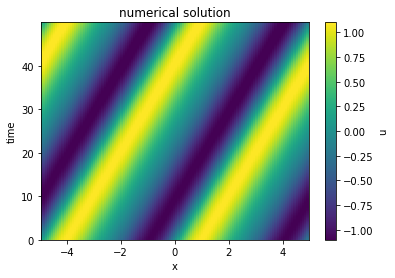

In [296]:
tmax = 2000000
cv = np.max( np.abs( solution[0,:] ) )
plt.pcolormesh( x, t[:tmax], solution[:tmax,:], vmin = -cv, vmax = cv)

cbar = plt.colorbar()
cbar.ax.set_ylabel('u')
plt.title('numerical solution')
plt.xlabel('x')
plt.ylabel('time')

In the color diagram above, we see that "wave" of our function is propagating to the right as time progresses. This matches our prediction in part(a) that $u(x,t) = f(x - U_0 t)$ with f(x) being the initial condition. Thus the temporal behavior of the function is like the initial condition $f(x)$ is propagating to the right as time progresses." The color diagram below is the plot of actual function, we can tell by observing the two diagram that they almost coincide with each other. 

In [280]:
def true_solu(x, t):
    ## method of characteristic gives us solution of f(x - U0t) if IC is f(x)
    ts = np.sin( 4 * np.pi * (x - U0 * t) / Lx ) + 0.25 * np.sin( 8 * np.pi * (x - U0 * t) / Lx )
    return ts

x = np.arange(delta_x / 2. - Lx/2, Lx/2, delta_x)
truesolution = []
## find a list consist all time points
k = 0
all_t_point = []
while k < final_time:
    all_t_point.append(k)
    k += delta_t
## get all_t point list that consist all the time points

## get a big true solution list with each unit as a list
for j in all_t_point:
    thetime = j
    ## find the subunit which has the identical t but all the x
    identicalt = []
    for i in x:
        exactnumber = true_solu(i, thetime)
        identicalt.append(exactnumber)
    truesolution.append(identicalt)
#print(len(truesolution))
#print(truesolution)

Text(0, 0.5, 'time')

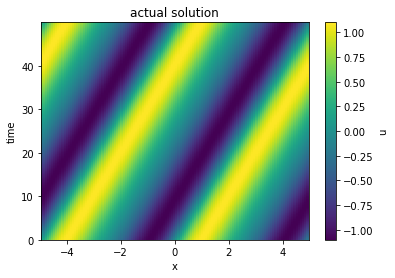

In [295]:
tmax = 2000000
cv = np.max( np.abs( solution[0,:] ) )
plt.pcolormesh( x, t[:tmax], truesolution, vmin = -cv, vmax = cv)

cbar = plt.colorbar()
cbar.ax.set_ylabel('u')
plt.title('actual solution')
plt.xlabel('x')
plt.ylabel('time')

### (c)

In [282]:
def RMS(truesolu,numsolu):
    cols=len(truesolu) # x funtions in different times
    rows=len(truesolu[0]) # in constant time different x values
    sum_diff_sqrt=0.0
    #print(cols*rows)
    rms = []
    for i in range(cols):
        for j in range(rows):
            #print(i,j)
            #print((truesolu[i][j] - numsolu[i][j]) ** 2)
            sum_diff_sqrt += (truesolu[i][j] - numsolu[i][j]) ** 2
        #print(sum_diff_sqrt)
        rms_row = (sum_diff_sqrt / rows) ** 0.5
        rms.append(rms_row)
    #rms = float((sum_diff_sqrt/(cols*rows))** 0.5)
    return rms
#function that computes the RMS of initial condition
def RMS_init(truesolu_init,numsolu_init):
    cols=len(numsolu_init)
    sum_diff_sqrt=0.0
    for i in range(cols):
        sum_diff_sqrt += (truesolu_init[i] - numsolu_init[i]) ** 2
    rms=(sum_diff_sqrt / cols) ** 0.5
    return rms

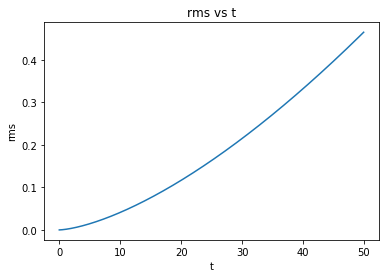

RMS at t=0:  0.0


In [302]:
#print(RMS(truesolution,solution))
p = RMS(truesolution,solution)
plt.title("rms vs t")
plt.xlabel("t")
plt.ylabel("rms")
plt.plot(t,p)
plt.show()
#compute the RMS of initial condition for reference 
rms_init=RMS_init(truesolution[0],solution[0])
print("RMS at t=0: ",rms_init)

We noticed that as t increases rms increases as well. The reason is obvious, as we go further in time and taking more and more time steps, the error terms build up resulting an increasing divation from the actual value. Thus this method of simulation holds only for small t, and as time progresses, the error "blow up". For reference, the RMS at $t=0$ is 0, as expected. 

### (d)

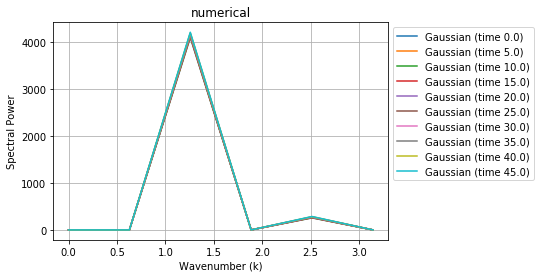

In [303]:
from scipy.fftpack import fft, ifft, fftfreq
kx = 2 * np.pi * fftfreq(Nx, d = delta_x)
plot_inds = np.arange(0,Nouts,128)
for i in plot_inds:
    u_hat = fft(solution[i])
    #plt.plot(kx[:Nx//2], np.abs(u_hat[:Nx//2])**2, label = 'Gaussian (time {0})'.format(i))
    plt.plot(kx[:Nx//20], np.abs(u_hat[:Nx//20])**2, label = 'Gaussian (time {0})'.format(i*5/128))
    #ax.axis('tight')


plt.xlabel('Wavenumber (k)')
plt.ylabel('Spectral Power')
plt.title('numerical')
plt.grid(True)

plt.legend( loc = 'upper left', bbox_to_anchor = (1, 0, 0.15, 1))



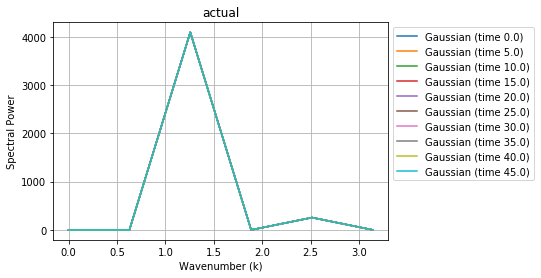

In [304]:
plot_inds = np.arange(0, Nouts, 128)
for i in plot_inds:
    u_hat = fft(truesolution[i])
    #plt.plot(kx[:Nx//2], np.abs(u_hat[:Nx//2])**2, label = 'Gaussian (time {0})'.format(i))
    plt.plot(kx[:Nx//20], np.abs(u_hat[:Nx//20])**2, label = 'Gaussian (time {0})'.format(i*5/128))
    #ax.axis('tight')


plt.xlabel('Wavenumber (k)')
plt.ylabel('Spectral Power')
plt.title('actual')
plt.grid(True)

plt.legend( loc = 'upper left', bbox_to_anchor = (1, 0, 0.15, 1))


In the actual solution, the gaussian of wavenumber $k$ never decrease in its peak value, and the spectual power is fixed for any $t$. However, in the numerical solution, the spectual power is slightly decreasing when the time is increased. 

### (e)
#### (i)

ODE for $E(t)$from PDE: 
$\frac{\partial u^2}{\partial t}= 2 u \frac{\partial u}{\partial t}$

$\frac{d E}{d t}= \frac{1}{2} \int_x \frac{\partial u^2}{\partial t}\,dx + U_0 [u^2(5, t) - u^2(-5, t)]$

$ \int_{-5}^{5} u \frac{\partial u}{\partial t} \,dx \ +\frac{U_0}{2}[u^2(5, t) - u^2(-5, t)] = 0$

$ u(\frac{L}{2}, t)^2 - u(- \frac{L}{2}, t)^2 = 0$ because based on periodic behavior $u(a, t)^2= u(b, t)^2$

Then, $\frac{d E}{d t}= 0 $


For every k value, there is a associated constant $C_k$ determined by IC.

$u_k (x,t) = C_k exp(ik(x - U_0 t))$

$E(t) = \sum_{k = - \infty}^{\infty} \int_x u_k (x, t)^2 \,dx = \sum_{k = - \infty}^{\infty} \int_x [C_k exp(ik(x - U_0 t))]^2 \,dx$

$[C_k exp(ik(x - U_0 t))]^2 = [cos(k(x - U_0 t))+i sin(k(x - U_0 t))]^2 = cos^2 (k(x - U_0 t)) + sin^2 (k(x - U_0 t) = 1 $

$E(t) = \sum_{k = - \infty}^{\infty} \int_x C_k^2 (1)^2 \,dx$, which is independent of t so $\frac{d E}{d t} = 0$

#### (ii)

In [286]:
def energy(solution,dx):
    cols=len(solution)
    rows=len(solution[0])
    E_t=[]
    for i in range(cols):
        temp=0
        for j in range(rows):
            temp+= solution[i][j]**2 * dx
        E_t.append(temp)
    return E_t
            

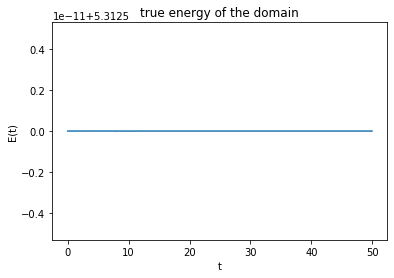

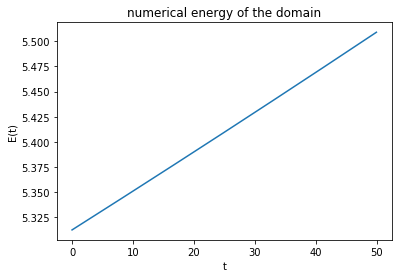

In [306]:
E_tr=energy(truesolution,delta_x)
plt.title('true energy of the domain')
plt.xlabel("t")
plt.ylabel("E(t)")
plt.plot(t,E_tr)
plt.show()
E_num=energy(solution,delta_x)
plt.title('numerical energy of the domain')
plt.xlabel("t")
plt.ylabel("E(t)")
plt.plot(t,E_num)
plt.show()

It is not consistent with our prediction. Since the solution is just a wave that propagates itself without any change in its amplitude. It is expected that the energy during the linear advection process stays unchanged, and it is unchanged when we use the actual solution to plot(see graph). However, in the numerical energy plot, we observe an increase of energy when time increases. This inconsistency is introduced because of our limitation in the ways of numerical analizing the PDE. When we take smaller time steps, we did observe that the slope of energy increase is smaller. 

## Question 2
### (a)
$\frac{\Delta u}{\Delta t}=\nu \frac{\Delta (\frac{\Delta u}{\Delta x})}{\Delta x} $

$\Delta t=\frac{\Delta x \Delta u}{v}\Delta(\frac{\Delta x}{\Delta u})$

$\Delta t=\frac{\Delta x^2}{\nu}$

### (b)
Let $u_i$ denote the function value at $x_i$, $u_i=u(x=x_i,t)$. 
By Taylor's Theorem, we have:

Eq.1: $u_{i+1} = u_i + \Delta x u'_i + \Delta x^2 \frac{u''_i}{2!} + \Delta x^3 \frac{u'''(c)}{3!}$

Eq.2: $u_{i-1} = u_i - \Delta x u'_i + \Delta x^2 \frac{u''_i}{2!} - \Delta x^3 \frac{u'''(c)}{3!}$

Eq.1 + Eq.2: $u_{i+1}+u_{i-1}=2u_i+\Delta x^2 u''_i$

$\therefore u''_i=\frac{u_{i+1}-2u_i+u_{i-1}}{\Delta x^2}$


### (c)
$\partial_t u=-i\omega e^{ikx}e^{i\omega t}=-i\omega u$

$\partial_{xx} u=-k^2 e^{ikx}e^{-i\omega t}=-k^2 u$

$-i\omega u=-\nu k^2 u$

$\therefore \omega =\frac{\nu k^2}{i}$

Substitute back:

$u=e^{ikx}e^{-\nu k^2 t}$

The expression tells us that the $u$ oscillates in space and decreases in time. The imaginary unit $i$ occuse in the term $e^{ikx}$. It indicates that for a given time, the value of $u$ oscillate periodically on the spectrum of space grid. The term $e^{-\nu k^2 t}$ on ther other hands indicates that $u$ approaches 0 as time evolves, since $-\nu k^2 <0$. For a big picture, in the bigining, we will observe a large-scale oscillation in space, and as time evolves, the amplitude of oscillation will become smaller and smaller. The oscillation in space depends on wavenumber $k$ since it's related to the frequency of oscillation. A larger $k$ corresponds to faster oscillation. It's also related to the speed that $u$ reduces it's amplitude. A larger $k$ results in a faster decaying amplitude.

### (d)

Delta t = 0.000610352, Delta x = 0.078125
The stored solution has 200 time points and 128 space points.


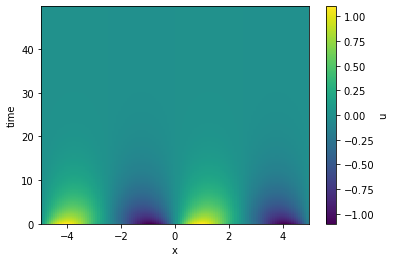

In [13]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Final time of the simulation
final_time = 50.

# Number of points in the computational grid
Nx = 128

# CFL factor
CFL = 0.1

# PDE Parameters
U0 = 0.1
Lx = 10.
v = 0.1

# dx and dt
delta_x = Lx / Nx
delta_t = CFL * CFL * delta_x * delta_x / v

print("Delta t = {0:g}, Delta x = {1:g}".format(delta_t, delta_x))

# Create spatial grid
x = np.arange(delta_x / 2. - Lx/2, Lx/2, delta_x)

# Specify the number of time points to store (Nouts)
#  they will be equally spaced throughout the simulation.
Nouts = 200
output_interval = final_time / Nouts
t = np.zeros(Nouts + 1)
t[0] = 0.

# Create an array to store the solution, and write in the initial conditions
solution = np.zeros((Nouts + 1,Nx))
solution[0,:] = np.sin( 4 * np.pi * x / Lx ) + 0.25 * np.sin( 8 * np.pi * x / Lx )

###
# Plot Initial Conditions for Reference
###
#plt.plot( x, solution[0,:], '-o' )

###
# Create a function to compute derivatives
# We'll tidy things up a bit (and so make our time-stepping code a little bit easier to read) by wrapping our derivative code up into a function.
###

def ddx(f, dx=delta_x):
    dfdx = (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)
    return dfdx

def d2dx2(f,dx=delta_x):
    d2fdx2 = (np.roll(f, 1) - 2 * f + np.roll(u, -1)) / (dx ** 2)
    return d2fdx2

###
# Compute Numerical Solution
###

curr_time = t[0]
u = solution[0, :]

next_output_time = output_interval
output_number = 0
while curr_time < final_time:

    # Compute the RHS of the ODE
#    dudt = - U0 * ddx(u)
    dudt = v * d2dx2(u)

    # Update first-order record
    u = u + delta_t * dudt

    # Increase 'time' by Delta t
    curr_time = curr_time + delta_t

    # Store the new values in our array, if at the right time
    if curr_time >= next_output_time:
        output_number = output_number + 1
        next_output_time += output_interval

        solution[output_number, :] = u
        t[output_number] = curr_time

# Helps to avoid odd errors from funky step sizes
t = t[:output_number]
solution = solution[:output_number, :]

print( "The stored solution has {0:d} time points and {1:d} space points.".format(*solution.shape) )

###
# Plot the Solution
###


tmax = 200
cv = np.max( np.abs( solution[0,:] ) )
plt.pcolormesh( x, t[:tmax], solution[:tmax,:], vmin = -cv, vmax = cv)

cbar = plt.colorbar()
cbar.ax.set_ylabel('u')

plt.xlabel('x')
plt.ylabel('time')

###
# Save the Data
###

# If we want to save the data to a file to analyze later, we can do that below.
#   Reading the data is similar to workbook 2

# This will save
#   - solution as 'u'
#   - t as 'time'
#   - x as 'x'
#   - U0 and 'U0'
np.savez('diffussion_data.npz', u = solution, time = t, x = x, U0 = U0)

plt.show()


In our simulation, we choose $Nx=128$ and $\Delta t = 0.000610352$.

The choice of Nx is to follow the requirement that it's better be a power of 2, since our machine computes based on binary digits. We select 128 out of 32, 64, 128, 256..., because smaller Nx will leave checker board patterns on the figure, and larger Nx cost too much time to run. We had tried dozens of $\Delta t$ values. If we observe noise on the graph, we input a new $\Delta t$ whose value is only half of the previous one. The choice above is a safe value that the values around will produce similar figure and result in no noise.

Based on the figure, looking at any specific time, the value of $u$ is oscillating on x-axis. Overall, as time evolves, the value of $u$ approaches zero.
Similarly for any point on x, the value of $u$ oscillates with the evolution of time. The figure agrees with our analysis in part (c).

### (e)
#### (i)

$ E(t) = \int_x u^2 \,dt$

$ \frac{dE}{dt} = 2 \int_x u \frac{\partial u}{\partial t}\, dx = 2 \nu \int_x u \frac{\partial^2 u}{\partial^2 t}\, dx$

$ \frac{dE}{dt} = \nu u \frac{\partial u}{\partial x} -  \int_x (\frac{\partial u}{\partial t})^2\, dx $

From the graph we know the BCs at $u(- \frac{L}{2}, t) = u(- \frac{L}{2}, t) = 0$

$\frac{dE}{dt} = - \int_x (\frac{\partial u}{\partial t})^2\, dx $, which is negative and shows the decaying behavior of the system.


If we do the integration directly, we find the $\int_x exp[2i(kx - \nu k^2 t)]\,dx = 2sin(10k) exp[-2i\nu k^2 t]$.

Then,$\frac{dE}{dt} = - 4i\nu k^2 sin(10k) exp[-2i\nu k^2 t]$, the derivative actually smaller than 0 and show the decading behavior.

#### (ii)

Text(0, 0.5, 'E(t)')

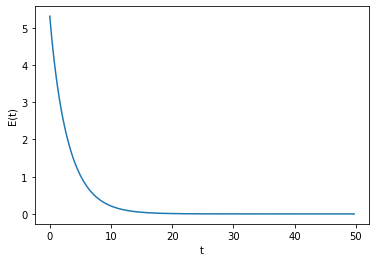

In [14]:
energy = np.zeros(tmax)
i = 0
while i < tmax:
    j = 0
    energy_sum = 0
    while j < Nx:
        energy_sum += delta_x * (solution[i, j] ** 2)
        j += 1
    energy[i] = energy_sum
    i += 1

plt.plot(t, energy)
plt.xlabel('t')
plt.ylabel('E(t)')

The plot is consistent with our prediction. From the figure of part (d), we observe that the value of $u$ approaches zero as time evolves. Thus $E(t)$ also approaches zero at large $t$. Although the numerical solution differs from actual solution to some degree (based on our observation of RMS from Question 1), the evolution of error is not comparable to the exponential decay.

## Question 3

### (a)
$\frac{\Delta u}{\Delta t}=\alpha\frac{\Delta}{\Delta x}(\frac{\Delta}{\Delta x}(\frac{\Delta u}{\Delta x}))$

$\Delta t=\frac{\Delta x^3}{\alpha}$


### (b)
Let $u_i$ denote the function value at $x_i$, $u_i=u(x=x_i,t)$. 
By Taylor's Theorem, we have:

Eq.1: 
$u_{i+1} = u_i + \Delta x u'_i + \Delta x^2 \frac{u''_i}{2!} + \Delta x^3 \frac{u'''_i}{3!} + \Delta x^4 \frac{u''''_i}{4!} + \Delta x^5 \frac{u'''''(c)}{5!}$

Eq.2:
$u_{i-1} = u_i - \Delta x u'_i + \Delta x^2 \frac{u''_i}{2!} - \Delta x^3 \frac{u'''_i}{3!} + \Delta x^4 \frac{u''''_i}{4!} - \Delta x^5 \frac{u'''''(c)}{5!}$

Eq.3: 
$u_{i+2} = u_i + 2\Delta x u'_i + 4\Delta x^2 \frac{u''_i}{2!} + 8\Delta x^3 \frac{u'''_i}{3!} + 16\Delta x^4 \frac{u''''_i}{4!} + 32\Delta x^5 \frac{u'''''(c)}{5!}$


Eq.1 - Eq.2:

Eq.5: $u_{i+1}-u_{i-1} = 2\Delta x u'_i  + 2\Delta x^3 \frac{u'''_i}{3!} + \Delta x^5 \frac{u'''''(c)}{5!}$


Eq.4 - Eq.3: 

Eq.6: $u_{i-2}-u_{i+2} = - 4\Delta x u'_i  - 16\Delta x^3 \frac{u'''_i}{3!} - 64\Delta x^5 \frac{u'''''(c)}{5!}$

$\therefore \frac{1}{2}(u_{i-2}-u_{i+2}) = - 2\Delta x u'_i  - 8\Delta x^3 \frac{u'''_i}{3!} - 32\Delta x^5 \frac{u'''''(c)}{5!}$

Assuming the remainder term to be zero, we have
Eq.5 + Eq.6:

$u_{i+1}-u_{i-1}+0.5u_{i-2}-0.5u_{i+2}=-\Delta x^3 u'''_i$

$\therefore u'''_{i}=\frac{-0.5u_{i+2}+u_{i+1}-u_{i-1}+0.5u_{i-2}}{\Delta x^3}$


### (c)
$\partial_t u=-i\omega e^{ikx}e^{i\omega t}=-i\omega u$

$\partial_{xxx} u=-ik^3 e^{ikx}e^{-i\omega t}=-ik^3 u$

$-i\omega u=-\alpha ik^3 u$

$\therefore \omega =\alpha k^3$

Substitute back:

$u=e^{ikx}e^{-i\alpha k^3t}$

Unlike the relation obtained in Question 2 (c), Imaginary unit occurs in both space term and time term. $e^{-i\alpha k^3t}$ indicates that $u$ doesn't have the simple increasing / decaying property in time but a oscillating property instead. Similar for space. So given a specific time, there will be oscillation in spcae, and given a specific location, there will be oscillation in time. The oscillation is related to the wave number $k$. The frequency of oscillation depends on $k$. A larger $k$ corresponds to a higher frequency of oscillation.

### (d)

Delta t = 2.38419e-06, Delta x = 0.078125
The stored solution has 200 time points and 128 space points.


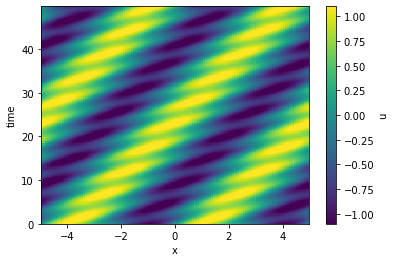

In [13]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Final time of the simulation
final_time = 50.

# Number of points in the computational grid
Nx = 128

# CFL factor
CFL = 0.0005

# PDE Parameters
U0 = 0.1
Lx = 10.
v = 0.1
a = 0.1

# dx and dt
delta_x = Lx / Nx
delta_t = CFL * delta_x * delta_x * delta_x / a

print("Delta t = {0:g}, Delta x = {1:g}".format(delta_t, delta_x))

# Create spatial grid
x = np.arange(delta_x / 2. - Lx/2, Lx/2, delta_x)

# Specify the number of time points to store (Nouts)
#  they will be equally spaced throughout the simulation.
Nouts = 200
output_interval = final_time / Nouts
t = np.zeros(Nouts + 1)
t[0] = 0.

# Create an array to store the solution, and write in the initial conditions
solution = np.zeros((Nouts + 1,Nx))
solution[0,:] = np.sin( 4 * np.pi * x / Lx ) + 0.25 * np.sin( 8 * np.pi * x / Lx )

###
# Plot Initial Conditions for Reference
###
#plt.plot( x, solution[0,:], '-o' )

###
# Create a function to compute derivatives
# We'll tidy things up a bit (and so make our time-stepping code a little bit easier to read) by wrapping our derivative code up into a function.
###

def ddx(f, dx=delta_x):
    dfdx = (np.roll(f, -1) - np.roll(f, 1)) / (2 * dx)

    return dfdx

def d2dx2(f,dx=delta_x):
    d2fdx2 = (np.roll(f, 1) - 2 * f + np.roll(u, -1)) / (dx ** 2)
    return d2fdx2

def d3dx3(f,dx=delta_x):
    d3udx3 = (- 0.5 * np.roll(u, 2) + np.roll(u, 1)
              - np.roll(u, -1) + 0.5 * np.roll(u, -2)
             ) / (dx ** 3)
    return d3udx3

###
# Compute Numerical Solution
###

curr_time = t[0]
u = solution[0, :]

next_output_time = output_interval
output_number = 0
while curr_time < final_time:

    # Compute the RHS of the ODE
#    dudt = - U0 * ddx(u)
    dudt = a * d3dx3(u)

    # Update first-order record
    u = u + delta_t * dudt

    # Increase 'time' by Delta t
    curr_time = curr_time + delta_t

    # Store the new values in our array, if at the right time
    if curr_time >= next_output_time:
        output_number = output_number + 1
        next_output_time += output_interval

        solution[output_number, :] = u
        t[output_number] = curr_time

# Helps to avoid odd errors from funky step sizes
t = t[:output_number]
solution = solution[:output_number, :]

print( "The stored solution has {0:d} time points and {1:d} space points.".format(*solution.shape) )

###
# Plot the Solution
###


tmax = 200
cv = np.max( np.abs( solution[0,:] ) )
plt.pcolormesh( x, t[:tmax], solution[:tmax,:], vmin = -cv, vmax = cv)

cbar = plt.colorbar()
cbar.ax.set_ylabel('u')

plt.xlabel('x')
plt.ylabel('time')

###
# Save the Data
###

# If we want to save the data to a file to analyze later, we can do that below.
#   Reading the data is similar to workbook 2

# This will save
#   - solution as 'u'
#   - t as 'time' 
#   - x as 'x'
#   - U0 and 'U0'
np.savez('dispersion_data.npz', u = solution, time = t, x = x, U0 = U0)

plt.show()


In our simulation, we choose $Nx=128$ and $\Delta t = 2.38419\times 10^{-6}$.

The choice of Nx is to follow the requirement that it's better be a power of 2, since our machine computes based on binary digits. We select 128 out of 32, 64, 128, 256..., because smaller Nx will leave checker board patterns on the figure, and larger Nx cost too much time to run the figure (the figure above takes more than half an hour). The choice of $\Delta t$ is purely selected by comparison. We had tried dozens of $\Delta t$ values. If we observe noise on the graph, we input a new $\Delta t$ whose value is only half of the previous one. Our final choice is the one that we find similar to the previous one but has no noise.

Based on the figure, looking at any specific time, the value of $u$ is oscillating on x-axis. Similarly for any point on x, the value of $u$ oscillates with the evolution of time. The figure agrees with our analysis in part (c).

### (e)

#### (i)

$ E(t) = \int_x u^2 \,dt$

$ \frac{dE}{dt} = 2 \int_x u \frac{\partial u}{\partial t}\, dx = 2 \alpha \int_x u \frac{\partial^3 u}{\partial x^3}\, dx$

$\frac{dE}{dt} = 2 \alpha [u \frac{\partial^2 u}{\partial x^2} - \int_x \frac{\partial u}{\partial t}\frac{\partial^2 u}{\partial x^2}\,dx] $

$\int_x \frac{\partial u}{\partial t}\frac{\partial^2 u}{\partial x^2}\,dx = \frac{1}{2}(\frac{\partial u}{\partial x})^2$

$ \frac{dE}{dt} = 2 \alpha [u \frac{\partial^2 u}{\partial x^2}]_{- \frac{L}{2}}^{\frac{L}{2}} - [\frac{1}{2}(\frac{\partial u}{\partial x})^2]_{- \frac{L}{2}}^{\frac{L}{2}}$

Since the dispersion is a period behavior and $|u(a,t)|= |u(b, t)|$, $|\frac{d u(a,t)}{dx}|= |\frac{d u(b, t)}{dx}|$, and $|\frac{d^2 u(a,t)}{dx}|= |\frac{d^2u(b, t)}{dx^2}|$.

Then, from the equation above, we can find the $ \frac{dE}{dt} = 0$.

#### (ii)

Text(0, 0.5, 'E(t)')

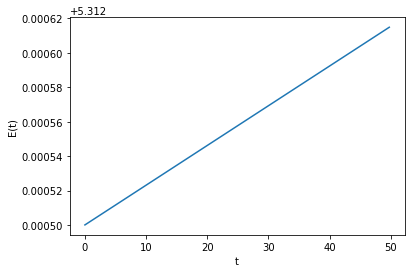

In [4]:
energy = np.zeros(tmax)
i = 0
while i < tmax:
    j = 0
    energy_sum = 0
    while j < Nx:
        energy_sum += delta_x * (solution[i, j] * solution[i,j] )
        j = j + 1
    energy[i] = energy_sum
    i = i + 1

plt.plot(time, energy)
plt.xlabel('t')
plt.ylabel('E(t)')

It is not consistent with our prediction. From figure of part (d), we observe that $u$ is like a wave propagates in space and time with constant amplitude. $E(t)$ is thus constant. However, the numerical solution of $E(t)$ above shows an linear increasing trend, like part (e) ii of Question 1. We should notice that the slope of this curve is quite negligible. The slope is resulted from th limit of numerical approach. If we have higher precision, i.e., smaller time step, the slope of plot above will be even smaller.

Since the solution is just a wave that propagates itself without any change in its amplitude. It is expected that the energy during the linear advection process stays unchanged, and it is unchanged when we use the actual solution to plot(see graph). However, in the numerical energy plot, we observe an increase of energy when time increases. This inconsistency is introduced because of our limitation in the ways of numerical analizing the PDE. When we take smaller time steps, we did observe that the slope of energy increase is smaller. 